# Exploring spaCy using Patent Data

In this notebook we will be looking at applying the functions of spaCy (https://spacy.io/) to patent data.

In [15]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [1]:
#Let's import spaCy
import spacy

nlp = spacy.load('en') 

In [2]:
#Let's get some Patent Data

# We'll start with our test XML file
from patentdata.corpus import USPublications

path = '/patentdata/tests/test_files'
ds = USPublications(path)

pdoc = next(ds.iter_xml()).to_patentdoc()
print(pdoc)

<Patent Document object for US20060085912A1, title: Siderail support mechanism - containing: description with 47 paragraphs and claimset with 39 claims; classifications: [<Classification A47C 21/08>]


In [3]:
# Create a parsed spaCy document object from the patent description
doc = nlp(pdoc.description.text)

In [4]:
roots = [sent.root for sent in doc.sents]

In [5]:
roots

[configured,
 claims,
 119(e,
 No,
 incorporated,
 relates,
 relates,
 relates,
 locked,
 is,
 known,
 come,
 has,
 be,
 configured,
 become,
 is,
 is,
 FIG,
 is,
 is,
 unlocked,
 is,
 is,
 is,
 is,
 FIG,
 FIG,
 is,
 unlocked,
 is,
 10,
 is,
 used,
 words,
 words,
 words,
 refer,
 include,
 adapted,
 includes,
 includes,
 includes,
 spaced,
 shown,
 include,
 are,
 secured,
 forces,
 shaft,
 includes,
 includes,
 configured,
 configured,
 apertures,
 apertures,
 includes,
 receives,
 includes,
 includes,
 configured,
 describes,
 detents,
 detents,
 mounted,
 includes,
 includes,
 includes,
 attached,
 urges,
 Referring,
 shown,
 are,
 1,
 is,
 received,
 Bushing,
 4,
 is,
 received,
 Referring,
 is,
 accomplished,
 6,
 Referring,
 4,
 withdrawn,
 moved,
 Referring,
 moved,
 3,
 With,
 deployed,
 aligns,
 handle,
 8,
 moves,
 Referring,
 shown,
 is,
 cogs,
 9,
 rotates,
 traverses,
 reaches,
 causes,
 held,
 forces,
 rotated,
 received,
 rotated,
 fixed,
 held,
 accomplished,
 3,
 does

In [6]:
roots[0].pos_

'VERB'

In [9]:
roots_tag = [r.tag_ for r in roots]

In [10]:
roots_tag

['VBN',
 'VBZ',
 'LS',
 'UH',
 'VBN',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBN',
 'VBZ',
 'VBN',
 'VB',
 'VBZ',
 'VB',
 'VBN',
 'VB',
 'VBZ',
 'VBZ',
 'NNP',
 'VBZ',
 'VBZ',
 'VBD',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBZ',
 'NNP',
 'NNP',
 'VBZ',
 'VBD',
 'VBZ',
 'CD',
 'VBZ',
 'VBN',
 'NNS',
 'NNS',
 'NNS',
 'VB',
 'VB',
 'VBN',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBN',
 'VBN',
 'VBP',
 'VBP',
 'VBN',
 'VBZ',
 'NN',
 'VBZ',
 'VBZ',
 'VBN',
 'VBN',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBN',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBN',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBN',
 'VBZ',
 'VBG',
 'VBN',
 'VBP',
 'LS',
 'VBZ',
 'VBN',
 'VBG',
 'LS',
 'VBZ',
 'VBN',
 'VBG',
 'VBZ',
 'VBN',
 'CD',
 'VBG',
 'LS',
 'VBN',
 'VBN',
 'VBG',
 'VBN',
 'CD',
 'IN',
 'VBD',
 'VBZ',
 'VB',
 'CD',
 'VBZ',
 'VBG',
 'VBN',
 'VBZ',
 'VBZ',
 'CD',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBZ',
 'VBN',
 'VBZ',
 'VBN',
 'VBN',
 'VBN',
 'VBN',
 'VBN',
 'VBN',
 'CD',
 'VBZ',
 'VB',
 'VBG',
 'VBN',
 'VBZ',
 'NNS',
 'VBP',
 'VBZ',
 'VBZ',
 'VBN',
 'VBP',
 'VBZ',
 'VB

In [12]:
len(list(roots[0].children))

7

In [13]:
no_children = [len(list(r.children)) for r in roots]

In [14]:
no_children

[7,
 5,
 3,
 0,
 7,
 4,
 5,
 6,
 5,
 4,
 5,
 6,
 3,
 7,
 6,
 7,
 3,
 3,
 2,
 5,
 3,
 5,
 3,
 3,
 4,
 3,
 3,
 2,
 3,
 5,
 3,
 6,
 3,
 6,
 5,
 5,
 3,
 6,
 4,
 7,
 3,
 3,
 4,
 7,
 3,
 4,
 5,
 4,
 4,
 10,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 3,
 3,
 3,
 6,
 3,
 4,
 6,
 6,
 3,
 4,
 3,
 5,
 4,
 3,
 5,
 4,
 3,
 4,
 6,
 3,
 3,
 3,
 5,
 2,
 8,
 5,
 2,
 2,
 3,
 5,
 6,
 3,
 5,
 2,
 2,
 4,
 3,
 6,
 3,
 3,
 3,
 6,
 4,
 6,
 1,
 4,
 5,
 7,
 4,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 3,
 4,
 3,
 1,
 3,
 3,
 3,
 7,
 6,
 3,
 4,
 3,
 3,
 3,
 5,
 4,
 3,
 1,
 2,
 2,
 7,
 5,
 1,
 3,
 1,
 3,
 6,
 6,
 3,
 6,
 5,
 6,
 5,
 1,
 3,
 6,
 3,
 3,
 3,
 5,
 4,
 8,
 6,
 5,
 5,
 6,
 7,
 7,
 7,
 6]

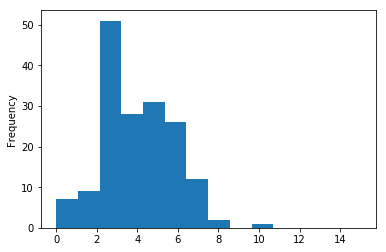

In [16]:
bins = np.linspace(0, 15, 15)
plt.hist(no_children, bins)
plt.ylabel('Frequency');

In [26]:
unique_no_children = set(no_children)
print(unique_no_children)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10}


So for our root rules we have n = 0 to 10 from this spec.

In [17]:
objects = [word for word in doc if "obj" in word.dep_]

In [18]:
objects

[locks,
 position,
 imposition,
 load,
 that,
 barrier,
 priority,
 35,
 application,
 which,
 reference,
 Field,
 Invention,
 mechanisms,
 siderails,
 one,
 aspects,
 mechanism,
 mechanisms,
 another,
 aspects,
 mechanism,
 feature,
 mechanisms,
 positions,
 safety,
 hospital,
 beds,
 siderails,
 position,
 side,
 door,
 siderail,
 doorjamb,
 potential,
 bed,
 mechanism,
 siderail,
 position,
 destructively,
 load,
 collision,
 barrier,
 transit,
 locks,
 position,
 imposition,
 load,
 that,
 barrier,
 description,
 siderail,
 mechanism,
 invention,
 mechanism,
 FIG,
 mechanism,
 FIGS,
 upright,
 position,
 mechanism,
 FIGS,
 upright,
 position,
 mechanism,
 FIGS,
 upright,
 position,
 mechanism,
 FIGS,
 upright,
 position,
 mechanism,
 FIGS,
 height,
 mechanism,
 FIGS,
 height,
 position,
 mechanism,
 FIGS,
 position,
 system,
 mechanism,
 position,
 embodiment,
 invention,
 mechanism,
 FIG,
 position,
 mechanism,
 FIGS,
 height,
 position,
 mechanism,
 FIGS,
 position,
 cog,
 notch,

In [24]:
unique_objects = set([o.text for o in objects])
print(unique_objects)

{'siderails', 'base', 'line', 'apertures', 'pin', '380', 'FIG', 'derivatives', '335', 'attachment', 'oblong', 'drawings', 'moves', 'thereto', 'detents', 'series', 'jarring', 'combination', 'contact', 'characteristics', 'lower', 'leftmost', 'L', 'end', 'aspects', 'respect', 'lever', 'destruction', 'mechanism', 'position', 'claims', 'notch', 'washer', 'plate', 'head', 'side', '260', 'bone', 'direction', 'shaft', 'those', 'device', 'reference', 'locks', '240', 'art', 'r.', '210', 'ends', 'distance', 'operator', 'indexing', 'pairs', 'opening', 'circumferentially', 'each', 'flush', 'toggles', 'convenience', 'spring', 'arms', 'right', 'import', 'foot', 'siderail', 'arc', 'Invention', 'diameter', 'transverse', 'use', 'other', 'patient', 'frame', 'description', 'application', 'catches', 'walls', 'Field', 'sidewalls', 'cogs', 'detent', 'transit', 'sections', 'another', 'elements', 'destructively', 'movement', 'addition', 'slidably', 'changes', 'height', 'embodiment', 'guard', 'upright', 'cog', 

In [19]:
subjects = [word for word in doc if "subj" in word.dep_]

In [25]:
unique_subjects = set([o.text for o in subjects])
print(unique_subjects)

{'pin', '45', '80', '9', '11', 'release', '245', '327', 'terminology', 'end', 'Description', 'lever', 'mechanism', 'notch', '355', 'plate', 'toggle', '340', 'shaft', 'reference', '5', '3', '210', '12', '305', 'support', '1', 'operator', 'indexing', 'each', 'second', '65', 'siderail', 'Each', 'secured', '4', 'This', '175', '95', '6', 'modifications', 'patient', 'catches', 'cogs', '503', 'patients', 'further', '50', '185', '8', 'hereinafter', 'embodiment', 'cog', 'link', 'angle', '407', '14', 'equivalents', '385', '10', 'differences', 'invention', 'impact', 'rotation', '13', '317', 'disclosure', '150', 'ball', '2', 'notches', 'that', 'aperture', 'it', '360', '7', 'bracket', '310', 'shafts', 'angles', '400', 'torque', '322', 'slot', 'collars', 'bed', 'word', 'locking', 'It', 'which'}


In [20]:
subjects

[mechanism,
 503,
 disclosure,
 invention,
 invention,
 invention,
 Description,
 It,
 siderail,
 It,
 patients,
 bed,
 impact,
 It,
 that,
 that,
 mechanism,
 invention,
 1,
 2,
 3,
 1,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 10,
 13,
 14,
 terminology,
 reference,
 word,
 terminology,
 mechanism,
 hereinafter,
 mechanism,
 bracket,
 siderail,
 siderail,
 65,
 50,
 siderail,
 each,
 45,
 toggle,
 80,
 shafts,
 45,
 link,
 95,
 link,
 further,
 shaft,
 mechanism,
 aperture,
 aperture,
 Each,
 175,
 Each,
 175,
 185,
 end,
 further,
 aperture,
 which,
 plate,
 plate,
 slot,
 slot,
 indexing,
 245,
 indexing,
 245,
 lever,
 lever,
 lever,
 lever,
 end,
 pin,
 185,
 3,
 mechanism,
 Each,
 50,
 plate,
 which,
 185,
 pin,
 ball,
 mechanism,
 mechanism,
 plate,
 This,
 release,
 lever,
 cogs,
 185,
 210,
 which,
 7,
 mechanism,
 each,
 50,
 second,
 7,
 operator,
 release,
 210,
 9,
 mechanism,
 support,
 mechanism,
 release,
 notches,
 150,
 notches,
 150,
 locking,
 mechanism,
 mechanism,
 pin,

### Observations

Reference numerals cause issues for sentence parsing - we need a function to strip these out.  

We also need to work out how to calibrate the sentence segmentation to add particular words that end with a full stop but that do not segment sentences.

In [21]:
from nltk import Tree

def tok_format(tok): 
    return "_".join([tok.orth_, tok.tag_]) 

def to_nltk_tree(node): 
    if node.n_lefts + node.n_rights > 0: 
        return Tree(tok_format(node), [to_nltk_tree(child) for child in node.children]) 
    else: 
        return tok_format(node)

In [27]:
for sent in doc.sents:
    tree = to_nltk_tree(sent.root)
    if isinstance(tree,Tree):
        tree.pretty_print() 

                                                                                                                     configured_VBN                                                                                                                                         
   ________________________________________________________________________________________________________________________|_____________________________________________________________________________________________________________________________________________    
  |     |    |                                     |                                                                       |                                              adapted_VBN                                                                                    |  
  |     |    |                                     |                                                                       |                                          _________|__________      

                        unlocked_VBD                                      
      _______________________|_________________________________________    
     |         |     |               10_CD                             |  
     |         |     |        _________|________                       |   
     |         |     |       |                in_IN                    |  
     |         |     |       |                  |                      |   
     |         |     |     11_CD            height_NN                 ;_: 
     |         |     |       |          ________|____________          |   
position_NN FIG_NNP ._.    -_SYM     the_DT           intermediate_JJ     
                                                                       _SP

                is_VBZ                              
   _______________|_______                           
  |    |               view_NN                      
  |    |    ______________|_________                 
  |    |   |      |            

                  configured_VBN                                                                                                                                                                                                         
   _____________________|________________________________________________________________                                                                                                                                                 
  |     |                             |                                               with_IN                                                                                                                                            
  |     |                             |                                                  |                                                                                                                                                
  |     |                             |                       

                                                                                     4_LS                                                                                                                                        
  ____________________________________________________________________________________|___________                                                                                                                                
 |   |                                                                                       rotated_VBN                                                                                                                         
 |   |     _______________________________________________________________________________________|_____________________________                                                                                                  
 |   |    |     |              |                                                              

            3_CD                                                                                                                                                                                                                  
    _________|_____________________                                                                                                                                                                                                
   |     |   |     |             as_IN                                                                                                                                                                                            
   |     |   |     |               |                                                                                                                                                                                               
   |     |   |     |             pin_NN                                                   

            are_VBP                                                                                                                                                     
  _____________|____________________________________________________________                                                                                             
 |   |                |                          |                     parallel_NN                                                                                      
 |   |                |                          |          ________________|_______________________                                                                     
 |   |                |                          |         |      |         |                    are_VBP                                                                
 |   |                |                          |         |      |         |                       |                                                    